# PHYS 5640 - Project 3
## Steven Stetzler

## The Fermi-Pasta-Ulam-Tsingou Nonlinear Lattice

We wish to use the method of **Velocity-Verlet Integration** to study the Fermi-Pasta-Ulam-Tsingou (FPTU) nonlinear chain problem. The FPTU problem consits of $N + 2$ particles, each with a mass $m$, on a $1D$ chain. Springs of spring constant $k$ connect each particle to its two adjacent neighbors. Each particle $n$ on this chain follows the following differential equation:

\begin{equation}
\tag{1}
m \ddot{u}_n = k \left( u_{n+1} + u_{n-1} - 2 u_n \right) + \alpha \left[ \left( u_{n+1} - u_n \right)^2 - \left( u_n - u_{n-1} \right)^2 \right]
\end{equation}

The endpoints of the chain are fixed: $u_0 = u_{N+1} = 0$ for all time $t$. $\alpha$ is a paramter that tells us how strong the non-linearity of the system is.

### (1) First consider the linear chain problem with $\alpha = 0$. Show that the normal modes of the chain are standing waves with wavevector $q = m\pi/(N + 1)$.

To show this, we first assume that, given the translational symmetry of the system, that the equations of motion of each of the particles is given by

$$
u_n(t) = A(t) e^{iqn}
$$

where $q$ is the wavevector. Plugging this solution into Eq. 1 (with $\alpha = 0$), we obtain

$$
m \ddot{A} e^{iqn} = k \left( Ae^{iq(n+1)} + Ae^{iq(n-1)} - 2 A e^{iqn} \right) \\
m \ddot{A} e^{iqn} = k A e^{iqn} \left( e^{iq} + e^{-iq} - 2 \right) \\
m \ddot{A} = 2 k A ( \cos(q)  - 1 )
$$

substituting in the trigometric identity

$$
2 \sin^2\left(\frac{q}{2}\right) = 1 - \cos(q)
$$

we obtain

$$
m \ddot{A} = - 4 k \sin^2\left(\frac{q}{2}\right) A \\
\ddot{A} = -4 \frac{k}{m} \sin^2\left(\frac{q}{2}\right) A \\
\ddot{A} = - w_q^2 A
$$

which can be solved easily for $A$:

$$
A = e^{i w_q t}
$$

where $w_q = 2 \sqrt{\frac{k}{m}} \sin\left(\frac{q}{2}\right)$ are the eigen-frequencies of the system. The eigen-modes of the system can be found by considering now solutions to $u_n$ of the form

\begin{equation}
\tag{2}
u_n(t) = A(t) e^{iqn} + B(t) e^{-iqn}
\end{equation}

which represent a forward and backward moving wave. We will now impose the boundary conditions of the system: $u_0(t) = u_{N+1}(t) = 0$

$$
u_0(t) = A(t) + B(t) = 0 \\
\rightarrow A(t) = -B(t)
$$

$$
u_{N+1}(t) = A(t) e^{iq(N+1)} + B(t) e^{-iq(N+1)} \\
u_{N+1}(t) = A(t) \left( e^{iq(N+1)} - e^{-iq(N+1)} \right) \\
u_{N+t}(t) = A(t) 2 i \sin(q(N+1)) = 0 \\
\rightarrow q(N+1) = m \pi \\
\rightarrow q = \frac{m\pi}{N+1}
$$

Plugging in what we've found from imposing boundary conditions to the solution given by Eq. 2 we obtain

$$
u_n^{(m)}(t) = A(t) 2 i \sin\left(\frac{mn\pi}{N+1} \right) \\
\rightarrow \xi_n^{(m)}(t) = \tilde{A}(t) \sin\left(\frac{mn\pi}{N+1} \right)
$$

giving the eigen-modes of the system $\xi_n^{(m)}$ which we can normalize by imposing the restriction that

$$
\sum_{n=1}^{N} \lvert \xi_n^{(m)} \rvert^2= 1 \\
\sum_{n=1}^{N} \lvert \tilde{A}(t) \sin\left(\frac{mn\pi}{N+1} \right) \rvert^2 = 1 \\
\rightarrow \lvert \tilde{A}(t) \rvert^2 = \frac{1}{\sum_{n=1}^{N} \sin^2\left(\frac{mn\pi}{N+1} \right)}
$$

Now, we must evaluate the sum $\sum_{n=1}^{N} \sin^2\left(\frac{mn\pi}{N+1} \right)$. First we will use the trigonometric identity $\sin^2(q) = \frac{1}{2} \left( 1 - \cos(2 q) \right)$ to obtain the sum:

$$
\frac{1}{2} \left( \sum_{n=1}^{N} 1 - \cos\left( \frac{2mn\pi}{N+1} \right) \right) = \frac{1}{2} \left( N - \sum_{n=1}^{N} \cos\left( \frac{2mn\pi}{N+1} \right) \right)
$$

which now only requires us to compute the sum $\sum_{n=1}^{N} \cos\left( \frac{2mn\pi}{N+1} \right)$. We can compute this sum by first looking at another sum which is similar:

$$
\sum_{k=0}^{n-1} \cos(2\pi f k) + i \sin(2 \pi f k) = \sum_{k=0}^{n-1} e^{2\pi i f k}
$$

The right hand side of this equation can be computed using the formula for a geometric series: $ \sum_{k=0}^{n-1} r^n = \frac{r^n - 1}{r - 1}$:

$$
\sum_{k=0}^{n-1} e^{2\pi i f k} = \frac{e^{2\pi i f n} - 1}{e^{2\pi i f} - 1} \\
= e^{\pi i f (n - 1)} \frac{e^{\pi i f n} - e^{-\pi i f n}}{e^{\pi i f} - e^{-\pi i f}} \\
= \left( \cos(\pi f (n - 1)) + i \sin(\pi f (n - 1)) \right) \frac{\sin(\pi f n)}{\sin(\pi f)}
$$

equating the real and imaginary parts in the expression above with the expression we started with we obtain

\begin{equation}
\tag{3}
\sum_{k=0}^{n-1} \cos(2\pi f k) = \cos(\pi f (n - 1)) \frac{\sin(\pi f n)}{\sin(\pi f)}
\end{equation}

We can make this result useful for us by expressing our sum as

$$
\sum_{n=1}^{N} \cos\left( \frac{2mn\pi}{N+1} \right) = \left( \sum_{n=0}^{N} \cos\left( 2 \pi f n  \right) \right) - 1
$$

by re-expressing $\frac{m}{N+1} = f$ and subtracting off the first term in the series (starting at $n = 0$). Quoting the result from Eq. 3 we obtain

$$
\sum_{n=1}^{N} \cos\left( \frac{2mn\pi}{N+1} \right) = \cos\left(\frac{mN\pi}{N+1} \right) \frac{\sin\left(m\pi\frac{N+1}{N+1}\right)}{\sin\left(\frac{m\pi}{N+1}\right)} - 1 = 0 - 1 = -1
$$

since the term $\sin\left(m\pi\frac{N+1}{N+1}\right) = \sin(m\pi) = 0 $ since $m \in Z$. Finally, this gives

$$
\sum_{n=1}^{N} \sin^2\left(\frac{mn\pi}{N+1} \right) = \frac{1}{2} \left( N - \sum_{n=1}^{N} \cos\left( \frac{2mn\pi}{N+1} \right) \right) = \frac{1}{2}\left(N + 1\right)
$$

This gives us the final normalization for $\xi_{n}^{(m)}$ of

$$
A = \frac{1}{\sqrt{\frac{1}{2}\left(N + 1\right)}} = \sqrt{\frac{2}{N+1}}
$$

giving the normalized eigen-modes with corresponding eigen-frequencies of

$$
\xi_n^{(m)} = \sqrt{\frac{2}{N+1}} \sin\left(\frac{mn\pi}{N+1} \right), \qquad w_q = 2 \sqrt{\frac{k}{m}} \sin\left(\frac{m\pi}{2\left(N+1\right)}\right)
$$

### (2)  Implement the Velocity-Verlet algorithm to solve the FPUT chain.

The Velocity-Verlet algorithm allows one to integrate equations of motion by computing the position, velocity, and acceleration of the particles at every time step of cadence $\Delta t$ of a simulation given only initial conditions for the particles $x(t=0)$, $\dot{x}(t = 0)$, and some function for the acceleration of the particles: $\ddot{x}(t)$. At the next time $t + \Delta t$ of a simulation, the position, velocity, and acceleration of a particle is given in terms of its current position, velocity, and acceleration:

\begin{equation}
\tag{4}
\overrightarrow{x}(t + \Delta t) = \overrightarrow{x}(t) + \overrightarrow{v}(t) \Delta t + \frac{1}{2} \overrightarrow{a}(t)\Delta t^2 \\
\overrightarrow{a}(t + \Delta t) = \ddot{\overrightarrow{x}}(t + \Delta t) \\
\overrightarrow{v}(t + \Delta t) = \overrightarrow{v}(t) + \frac{1}{2} \left(\overrightarrow{a}(t) + \overrightarrow{a}(t + \Delta t)  \right) \Delta t
\end{equation}

A generalized Velocity-Verlet is implemented in the function `velocity_verlet()`.

We simulate the motion of each of the particles in the FPUT chain using Velocity-Vertlet given the initial condition $u_n(t = 0) = \mathcal{A} \xi_n^{(1)} $ and $\dot{u}_n(t=0) = 0$ where $\mathcal{A}$ is a parameter that governs the strength of the initial perturbation of the chain. The acceleration of the particles is governed by Eq. 1. This initial condition represents pulling the chain into its first excited mode ($m = 1$) and then releasing it from rest. At each step of the simulation we compute both the *potential* and *kinetic* energies $E_p$ and $E_k$ as follows

\begin{equation}
\tag{5}
E_p = \sum_{n=0}^{N} \frac{k}{2} \left( u_{n+1} - u_n \right)^2, \qquad E_k = \sum_{n=1}^{N} \frac{m \dot{u}_n^2}{2}
\end{equation}

In [1]:
# Import useful libraries
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [2]:
# Plotting parameters
rcParams['figure.figsize'] = [12, 12]
rcParams['font.size'] = 24
rcParams['axes.labelsize'] = 28
rcParams['axes.labelpad'] = 15

In [3]:
# A generalized velocity verlet that takes as arguments the initial position and velocities of a
# set of particles and evolves them on the time scale delta_t using the function acceleration
# This function computes the values of any observables at each time step passed to it using the funcs list
def velocity_verlet(x, v, delta_t, num_iter, acceleration=lambda x : 0, funcs=[], **kwargs):
    ret_vals = [[] for i in range(len(funcs))]
    x_now, v_now = x, v
    for i in range(num_iter):
        for func, ret_val in zip(funcs, ret_vals):
            ret_val.append(func(x_now, v_now, **kwargs))
        
        a_now = acceleration(x_now, **kwargs)
        
        x_next = x_now + v_now * delta_t + 0.5 * a_now * delta_t**2
        
        a_next = acceleration(x_next, **kwargs)
        
        v_next = v_now + 0.5 * (a_now + a_next) * delta_t
        
        x_now, v_now = x_next, v_next
        
        print("{:0.1f}% done      ".format(100 * (i + 1) / num_iter), end='\r')
        
    return ret_vals

# Compute the acceleration felt by each particle in the chain
def accel(u, k=1, m=1, alpha=0, **kwargs):
    a = np.zeros(len(u))
    # Particles to the right
    u_shift_up = np.roll(u, -1)
    # Particles to the left
    u_shift_down = np.roll(u, 1)
    
    # Eq. (1)
    a = (k * (u_shift_up + u_shift_down - 2 * u) + alpha * ((u_shift_up - u)**2 - (u - u_shift_down)**2)) / m
    
    # Impose boundary conditions
    a[0] = 0
    a[len(u) - 1] = 0
    
    return a

# Kinetic energy of the chain
# Eq. (5)
def KE(u, u_d, m=1, **kwargs):
    return 0.5 * m * np.sum((u_d**2))#[1:len(u) - 1])**2)

# Potential energy of the chain
# Eq. (5)
def PE(u, u_d, k=1, **kwargs):
    u_shift = np.roll(u, -1)
    return 0.5 * k * np.sum(((u_shift - u)**2))#[1:len(u) - 1])**2)

We will run a simulation of the FPUT chain using the following parameters: there $N = 36$ movable particles in the chain, $m = k = 1$, $\alpha = 0$ (the chain is linear), and the strength of the initial perturbation is $\mathcal{A} = 0.2$. The initial condition of the chain is $u_n(t = 0) = \mathcal{A} \xi_n^{(1)} $ and $\dot{u}_n(t=0) = 0$.

In [4]:
def run_sim_one(N, A, k, m, delta_t, num_iter, **kwargs):
    u = A * np.sqrt(2 / (N + 1)) * np.sin(np.arange(N + 2) * np.pi / (N + 1))
    u[0] = 0
    u[N + 1] = 0
    u_d = np.zeros(N + 2)

    rets = velocity_verlet(u, u_d, delta_t, num_iter, acceleration=accel, funcs=[lambda x, v, **kwargs : x, lambda x, v, **kwargs : v, KE, PE], **kwargs)

    return rets

In [5]:
N = 36
A = 0.2
k, m = 1, 1
w_1 = 2 * np.sqrt(k / m) * np.sin(1 * np.pi / (2 * (N + 1)))

delta_t = 0.01
num_iter = int(2 * 2 * np.pi / (w_1 * delta_t))
t_1 = np.arange(num_iter) * delta_t * w_1 / (2 * np.pi)

ret_vals = run_sim_one(N, A, k, m, delta_t, num_iter)

E_k_1 = np.array(ret_vals[2])
E_p_1 = np.array(ret_vals[3])
E_total_1 = E_k_1[0] + E_p_1[0]
E_error_1 = np.abs(E_total_1 - (E_k_1 + E_p_1)) / E_total_1
E_max_1 = np.max(E_error_1)

We plot here the *potential* and *kinetic* energy of the chain as a function of time, exploring how energy oscillates in the system. We find that while energy is swapped between potential and kinetic, the total energy of the system remains constant. 

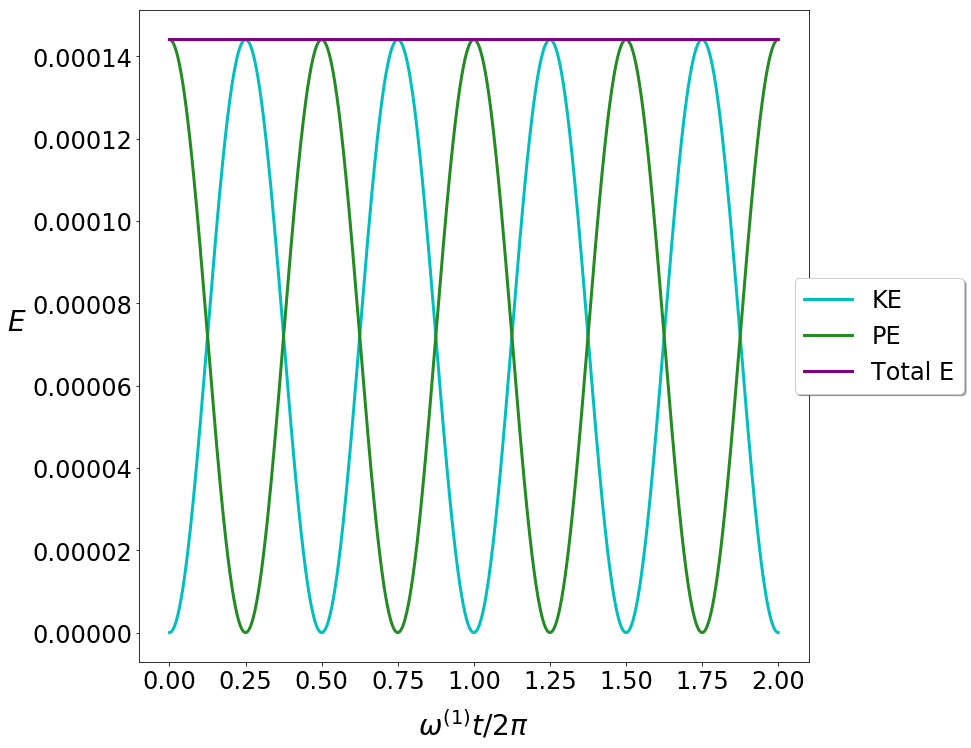

In [6]:
plt.plot(t_1, E_k_1, label='KE', color='c', lw=3)
plt.plot(t_1, E_p_1, label='PE', color='forestgreen', lw=3)
plt.plot(t_1, np.ones(len(E_k_1)) * (E_k_1[0] + E_p_1[0]), label='Total E', color='purple', lw=3)

plt.xlabel(r"$\omega^{(1)} t / 2 \pi$")
plt.ylabel(r"$E$", rotation=0)

plt.legend(loc='right', bbox_to_anchor=(1.25, .5), ncol=1, fancybox=True, shadow=True)
plt.show()

We observe that the energy of the system oscillates between potential and kinetic energy with a period of $\pi / \omega^{(1)}$.

Next, we explore how the energy of the system fluctuates on small timescales given a few different values of $\Delta t$. We explore the total energy fluctuation for $\Delta t = 0.01, 0.02, \text{ and } 0.04$.

In [7]:
delta_t = 0.02
num_iter = int(4 * np.pi / (w_1 * delta_t))
t_2 = np.arange(num_iter) * delta_t * w_1 / (2 * np.pi)

ret_vals = run_sim_one(N, A, k, m, delta_t, num_iter)

E_k = np.array(ret_vals[2])
E_p = np.array(ret_vals[3])
E_total = E_k[0] + E_p[0]
E_error_2 = np.abs(E_total - (E_k + E_p)) / E_total
E_max_2 = np.max(E_error_2)

In [8]:
delta_t = 0.04
num_iter = int(4 * np.pi / (w_1 * delta_t))
t_3 = np.arange(num_iter) * delta_t * w_1 / (2 * np.pi)

ret_vals = run_sim_one(N, A, k, m, delta_t, num_iter)

E_k = np.array(ret_vals[2])
E_p = np.array(ret_vals[3])
E_total = E_k[0] + E_p[0]
E_error_3 = np.abs(E_total - (E_k + E_p)) / E_total
E_max_3 = np.max(E_error_3)

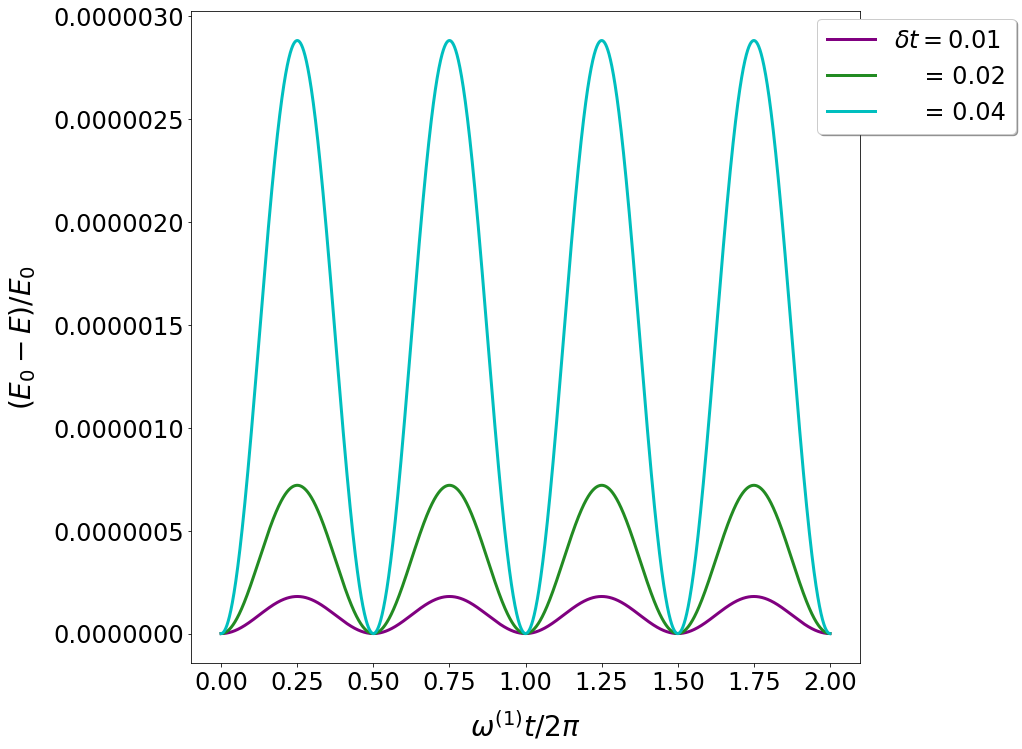

In [9]:
plt.plot(t_1, E_error_1, label=r'$\delta t = 0.01$', color='purple', lw=3)
plt.plot(t_2, E_error_2, label=r'    = 0.02', color='forestgreen', lw=3)
plt.plot(t_3, E_error_3, label=r'    = 0.04', color='c', lw=3)

plt.ylabel(r"$\left( E_0 - E \right)/E_0$")
plt.xlabel(r"$\omega^{(1)} t / 2 \pi$")

plt.legend(loc='right', bbox_to_anchor=(1.25, .90), ncol=1, fancybox=True, shadow=True)
plt.show()

We find that the error is of order $\lvert E_0 - E \rvert / E_0 \sim 10^{-6}$ and that the error oscillates with a period of $\pi/w^{(1)}$.

Next we explore how the maximum error of the energy scales with $\Delta t$ by finding the peak error within a simulation of the chain for values of $\Delta t = 0.01, 0.02, 0.04, 0.08, 0.16, 0.32, \text{ and } 0.64$.

In [10]:
delta_ts = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64]
E_maxs = []
for delta_t in delta_ts:
    num_iter = int(4 * np.pi / (w_1 * delta_t))

    ret_vals = run_sim_one(N, A, k, m, delta_t, num_iter)

    E_k = np.array(ret_vals[2])
    E_p = np.array(ret_vals[3])
    E_total = E_k[0] + E_p[0]
    E_error = np.abs(E_total - (E_k + E_p)) / E_total
    E_max = np.max(E_error)
    E_maxs.append(E_max)

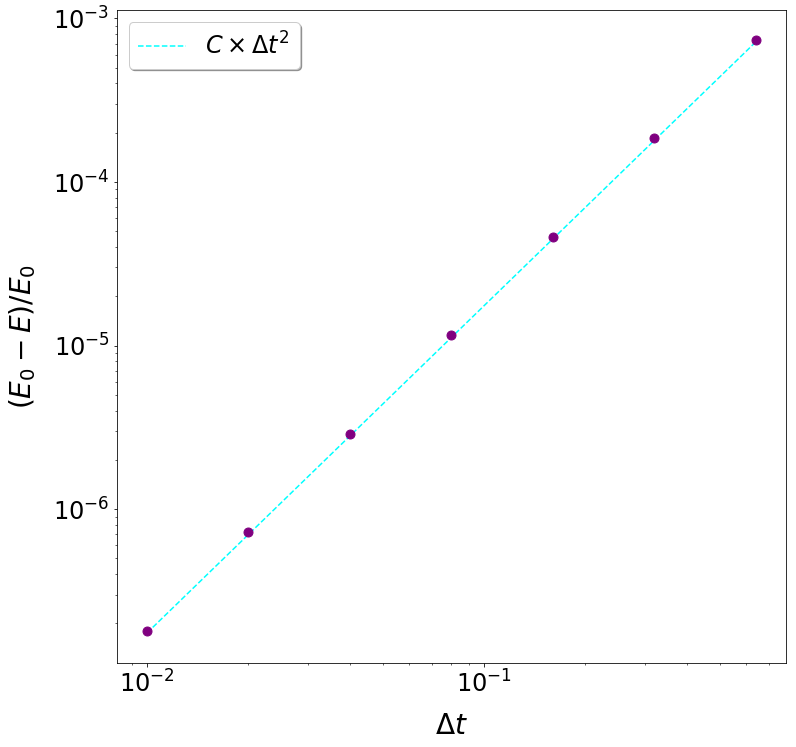

In [11]:
plt.loglog(delta_ts, 0.00175 * np.array(delta_ts)**2, linestyle='--', color='cyan', label=r'$C \times \Delta t^2$')
plt.loglog(delta_ts, E_maxs, linestyle='None', color='purple', marker='o', markersize=9)

plt.xlabel(r"$\Delta t$")
plt.ylabel(r"$\left(E_0 - E \right) / E_0$")

plt.legend(fancybox=True, shadow=True)
plt.show()

### (3) Linear chain with localized perturbations

Now, instead of exciting a single mode of the chain (previously just the $m = 1$ mode), we will excite the chain with some localized perturbation. Specifically, we will use the initial conditions $u_n(t=0) = 0$ and $\dot{u}_n(t=0) = \mathcal{B} \exp \left( \frac{- (n - N / 2)^2}{\sigma_0^2} \right)$ where $\mathcal{B}$ is a constant characterizing the strength of this perturbation and $\sigma_0$ characterizes the width of the perturbation. This initial perturbation is equivalent to having a chain at rest in its equilibrium position and then giving it a small, gaussian-shaped kick at the center of the chain. To investigate this perturbation, we define a "local energy" as

\begin{equation}\tag{6}
E_L(n) = \frac{m\dot{u}_n^2}{2} + \frac{k}{4} \left[ \left( u_{n+1} - u_n\right)^2 + \left( u_n - u_{n-1}\right)^2 \right]
\end{equation}

which measures both the kinetic and potential energy stored in particle $n$.

In [12]:
# The local energy stored in the chain
# Eq. (6)
def LE(u, u_d, m=1, k=1, **kwargs):
    u_shift_up = np.roll(u, -1)
    u_shift_down = np.roll(u, 1)
    E = np.zeros(len(u))
    E = (m / 2) * u_d**2 + (k / 4) * ((u_shift_up - u)**2 + (u - u_shift_down)**2)
    E[0] = 0
    E[len(u) - 1] = 0
    return E

# Simulates a linear chain with a localized gaussian perturbation centered at the middle of the chain
def run_sim_two(N, B, k, m, sigma, delta_t, num_iter, **kwargs):
    u = np.zeros(N + 2)
    u_d = np.zeros(N + 2)
    
    u_d[1:N + 1] = B * np.exp( -(np.arange(N) - N / 2)**2 / sigma**2 )

    rets = velocity_verlet(u, u_d, delta_t, num_iter, acceleration=accel, funcs=[lambda x, v, **kwargs : x, lambda x, v, **kwargs : v, KE, PE, LE], **kwargs)

    return rets

We run a simulation of the chain with the initial perturbation given above with the paramters $N = 100$, $m = k = 1$, $\Delta_t = 0.04$, $\mathcal{B} = 0.8$, and $\sigma_0 = 10$.

In [13]:
N = 100
B = 0.8
sigma = 10
m, k = 1, 1

delta_t = 0.04
num_iter = int(4 * np.pi / (w_1 * delta_t))
t = np.arange(num_iter) * delta_t * w_1 / (2 * np.pi)

ret_vals = run_sim_two(N, B, k, m, sigma, delta_t, num_iter)

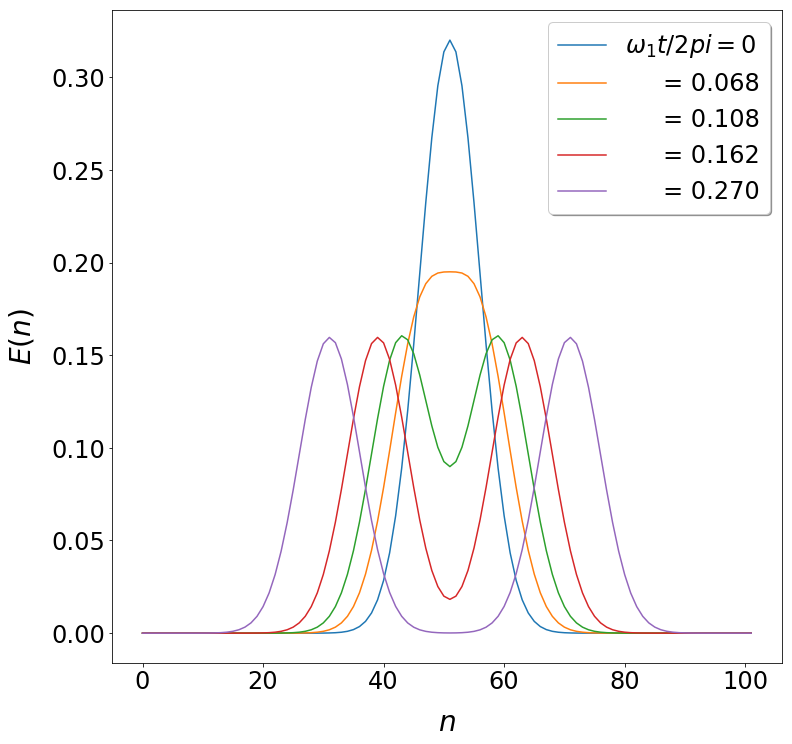

In [14]:
E_l = np.array(ret_vals[4])

plt.plot(E_l[0], label=r'$\omega_1 t / 2 pi = {:0.0f}$'.format(0 * delta_t * w_1 / (2 * np.pi)))
plt.plot(E_l[125], label=r'     = {:0.3f}'.format(125 * delta_t * w_1 / (2 * np.pi)))
plt.plot(E_l[200], label=r'     = {:0.3f}'.format(200 * delta_t * w_1 / (2 * np.pi)))
plt.plot(E_l[300], label=r'     = {:0.3f}'.format(300 * delta_t * w_1 / (2 * np.pi)))
plt.plot(E_l[500], label=r'     = {:0.3f}'.format(500 * delta_t * w_1 / (2 * np.pi)))

plt.xlabel(r"$n$")
plt.ylabel(r"$E(n)$")

plt.legend(fancybox=True, shadow=True)
plt.show()

We find that the initial pertubation spreads into two symmetric waves moving to the left and to the right along the chain. These wavefronts move with velocity $v = \sqrt{k/m}$.


### (3 - bonus) Investigate how the energy spreads in a nonlinear FPU chain ($\alpha \neq 0$)

We can also explore how the initial perturbation distributes over the chain for a non-linear chain ($\alpha \neq 0$). In the following simulation, we repeat the above simulation with similar parameters, except we increase the time precision to $\delta_t = 0.01$ and change the non-linearity coefficient to $\alpha = 0.5$.

In [15]:
N = 100
B = 0.8
sigma = 10
m, k = 1, 1

delta_t = 0.01
num_iter = int(4 * np.pi / (w_1 * delta_t))
t = np.arange(num_iter) * delta_t * w_1 / (2 * np.pi)

ret_vals = run_sim_two(N, B, k, m, sigma, delta_t, num_iter, alpha=0.5)

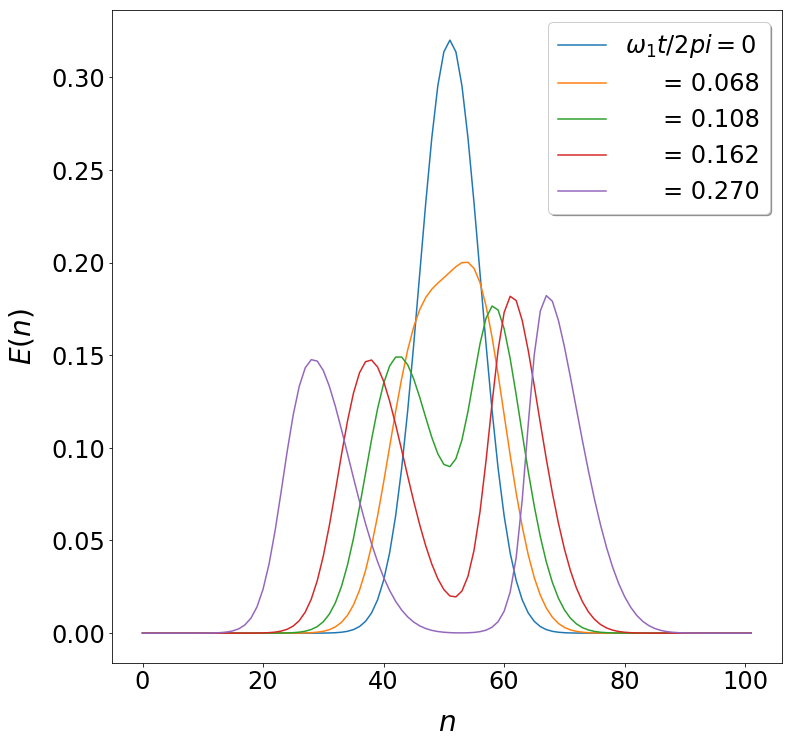

In [16]:
E_l = np.array(ret_vals[4])

plt.plot(E_l[0], label=r'$\omega_1 t / 2 pi = {:0.0f}$'.format(0 * delta_t * w_1 / (2 * np.pi)))
plt.plot(E_l[500], label=r'     = {:0.3f}'.format(500 * delta_t * w_1 / (2 * np.pi)))
plt.plot(E_l[800], label=r'     = {:0.3f}'.format(800 * delta_t * w_1 / (2 * np.pi)))
plt.plot(E_l[1200], label=r'     = {:0.3f}'.format(1200 * delta_t * w_1 / (2 * np.pi)))
plt.plot(E_l[2000], label=r'     = {:0.3f}'.format(2000 * delta_t * w_1 / (2 * np.pi)))
plt.xlabel(r"$n$")

plt.ylabel(r"$E(n)$")
plt.legend(fancybox=True, shadow=True)
plt.show()

We observe similar behavior to the linear case: two waves propogating to the left and to the right from the initial perturbation. However, the propogation is not symmetric: the wave moving to the right seems to have a larger amplitude than the wave moving to the right as more energy is stored in the particles on the right side of the chain.

We can bump up the non-linearity by increasing $\alpha$ to $\alpha = 1$ and increasing the time resolution to $\Delta t = 0.005$.

In [17]:
N = 100
B = 0.8
sigma = 10
m, k = 1, 1

delta_t = 0.005
num_iter = int(4 * np.pi / (w_1 * delta_t))
t = np.arange(num_iter) * delta_t * w_1 / (2 * np.pi)

ret_vals = run_sim_two(N, B, k, m, sigma, delta_t, num_iter, alpha=1.0)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in square


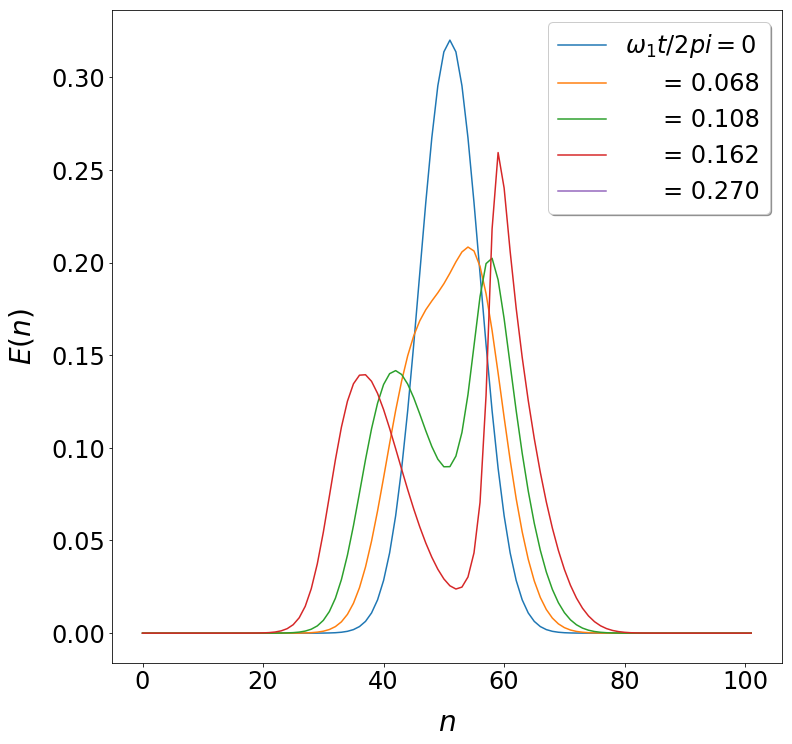

In [18]:
E_l = np.array(ret_vals[4])

plt.plot(E_l[0], label=r'$\omega_1 t / 2 pi = {:0.0f}$'.format(0 * delta_t * w_1 / (2 * np.pi)))
plt.plot(E_l[1000], label=r'     = {:0.3f}'.format(1000 * delta_t * w_1 / (2 * np.pi)))
plt.plot(E_l[1600], label=r'     = {:0.3f}'.format(1600 * delta_t * w_1 / (2 * np.pi)))
plt.plot(E_l[2400], label=r'     = {:0.3f}'.format(2400 * delta_t * w_1 / (2 * np.pi)))
plt.plot(E_l[4000], label=r'     = {:0.3f}'.format(4000 * delta_t * w_1 / (2 * np.pi)))
plt.xlabel(r"$n$")

plt.xlabel(r"$n$")
plt.ylabel(r"$E(n)$")
plt.legend(fancybox=True, shadow=True)
plt.show()

We observe similar, yet more extreme behavior than in the $\alpha = 0.5$ case: two wavefronts propogating to the left and right, but the right obtaining preferential energy from the initial perturbation. By increasing $\alpha$ we've increasing the asymmetry in the left and right moving waves.

### (4) Energy distribution in a nonlinear FPUT chain

Next, we explore how the energy from an initial perturbation that excites only the first $m = 1$ mode. We will observe how the energy of the system spreads among each of the normal modes of oscillation. We will define the mode amplitude as

\begin{equation}\tag{7}
Q_m(t) = \sum_{n=1}^{N} u_n(t) \xi_n^{(m)} = \sqrt{\frac{2}{N + 1}} \sum_{n=1}^{N} u_n(t) \sin\left( \frac{mn\pi}{N+1} \right)
\end{equation}

and the energy stored in the $m^{th}$ mode as

\begin{equation}\tag{8}
E_m(t) = \frac{m}{2} \left( \dot{Q}_m^2 + \left(w^{(m)} Q_m\right)^2 \right)
\end{equation}


In [19]:
# The mode energy of the chain
# Eq. (8)
def ME(u, u_d, m=1, num_modes=4, **kwargs):
    N = len(u) - 2
    w = 2 * np.sqrt(k / m) * np.sin(np.arange(1, num_modes + 1) * np.pi / (2 * (N + 1)))
    mn = np.outer(np.arange(1, num_modes + 1), np.arange(len(u)))
    # The mode amplitude
    # Eq. (7)
    Q = np.sqrt(2 / (N + 1)) * np.sum(u * np.sin(mn * np.pi / (N + 1)), axis=1)
    # The time derivative of the mode amplitude
    # Time derivative of Eq. (7)
    Q_d = np.sqrt(2 / (N + 1)) * np.sum(u_d * np.sin(mn * np.pi / (N + 1)), axis=1)
    return (m / 2) * (Q_d**2 + (w**2) * Q**2)

# Runs a simulation of the chain with an initial perturbation exciting only the first mode of oscillation
def run_sim_three(N, B, k, m, delta_t, num_iter, **kwargs):
    u = A * np.sqrt(2 / (N + 1)) * np.sin(np.arange(N + 2) * np.pi / (N + 1))
    u[0] = 0
    u[N + 1] = 0
    u_d = np.zeros(N + 2)

    rets = velocity_verlet(u, u_d, delta_t, num_iter, acceleration=accel, funcs=[lambda x, v, **kwargs : x, lambda x, v, **kwargs : v, KE, PE, ME], **kwargs)

    return rets

We run the simulation of the non-linear chain with parameters $N = 36$, $\Delta t = 0.02$, $m = k = 1$, $\mathcal{A} = 0.5$, and the non-linear parameter $\alpha = 1.25$. The initial conditions of the chain are $u_n(t = 0) = \mathcal{A} \xi_n^{(1)} $ and $\dot{u}_n(t=0) = 0$.

In [20]:
N = 36
A = 0.5
alpha = 1.25
m, k = 1, 1

delta_t = 0.02
num_iter = int(280 * 2 * np.pi / (w_1 * delta_t))
t = np.arange(num_iter) * delta_t * w_1 / (2 * np.pi)

ret_vals = run_sim_three(N, A, k, m, delta_t, num_iter, alpha=alpha)

x = np.array(ret_vals[0])
v = np.array(ret_vals[1])
E_k = np.array(ret_vals[2])
E_p = np.array(ret_vals[3])
E_m = np.array(ret_vals[4])

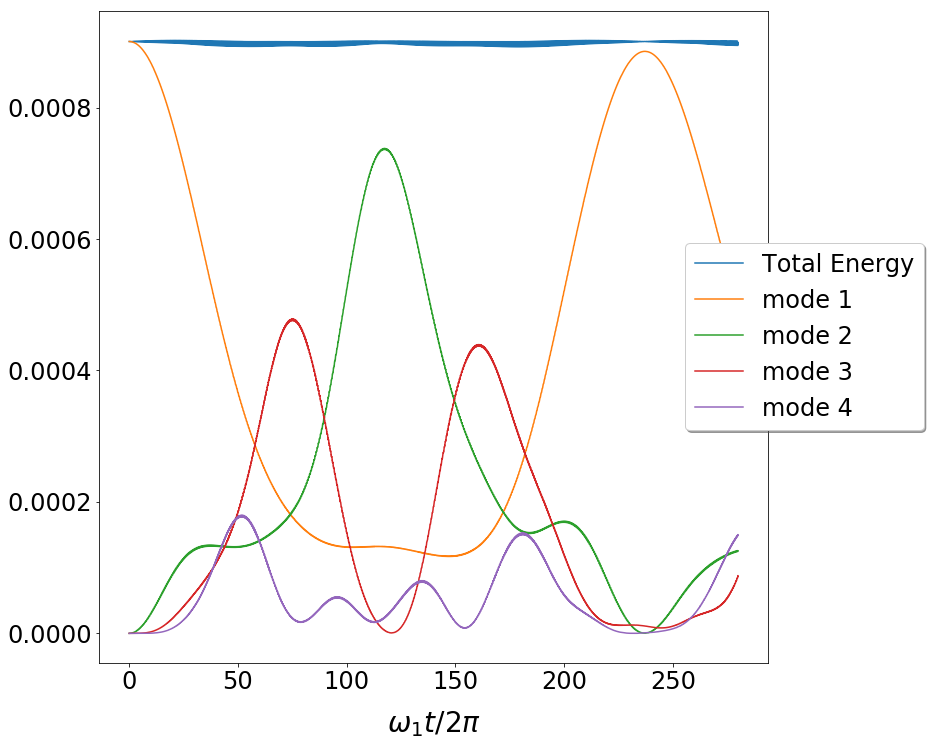

In [21]:
plt.plot(t, E_k + E_p, label='Total Energy')

for i in range(0, 4):
    plt.plot(t, E_m[:, i], label='mode {}'.format(i + 1))

plt.xlabel(r"$\omega_1 t / 2 \pi$")
    
plt.legend(loc='right', bbox_to_anchor=(1.25, .5), ncol=1, fancybox=True, shadow=True)
plt.show()

We observe that initially, all energy is in the first mode of oscillation, which is the only mode initially excited. We expect that the energy will drift among the modes and eventually reach a distribution consistent with the equipartition of energy. However, in the plot above, we see that after some time, almost all of the energy of the system returns to the first mode!